In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz" 

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close() 

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

/Users/amit/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,NaN,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,NaN,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,NaN,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


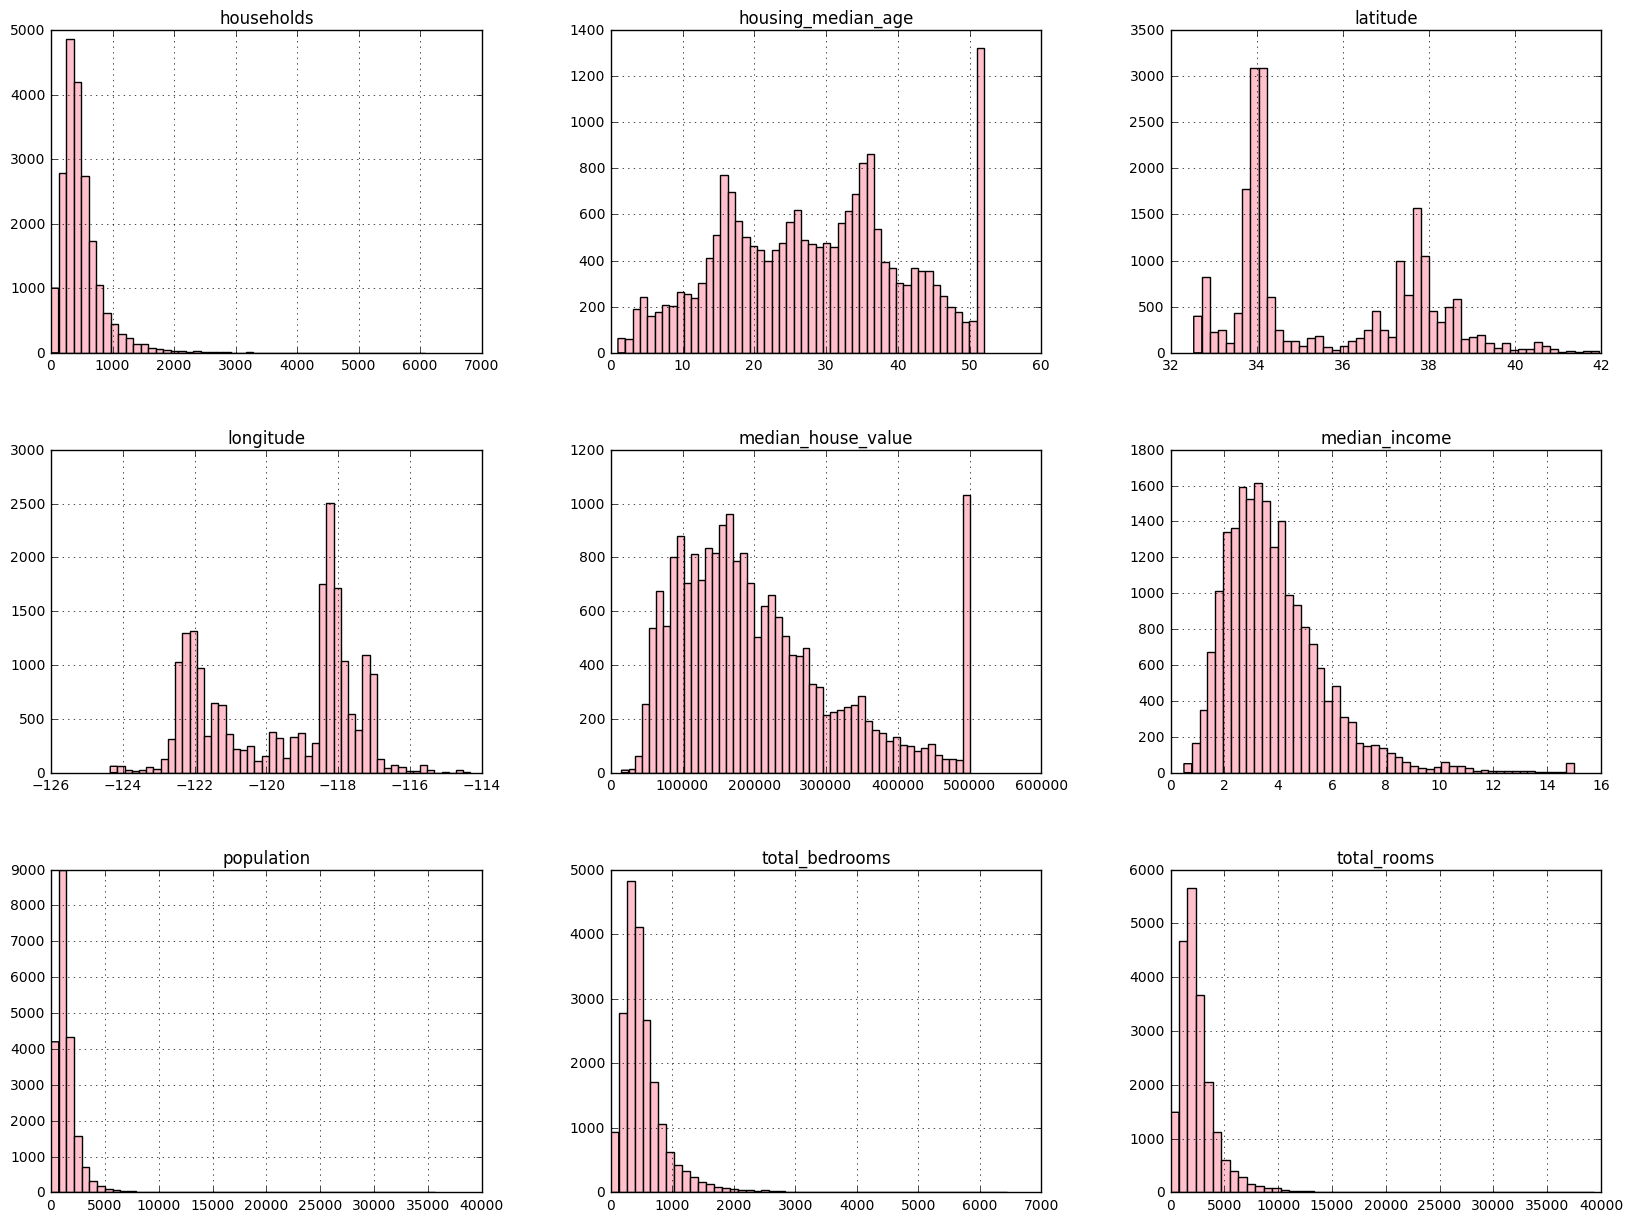

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize=(20,15), color = "pink")
plt.show()

### Train Test Split

In [12]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size= int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices =  shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [14]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [15]:
def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    
    return data.loc[~in_test_set],data.loc[in_test_set]

In [16]:
housing_with_id = housing.reset_index()

In [17]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [18]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [20]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

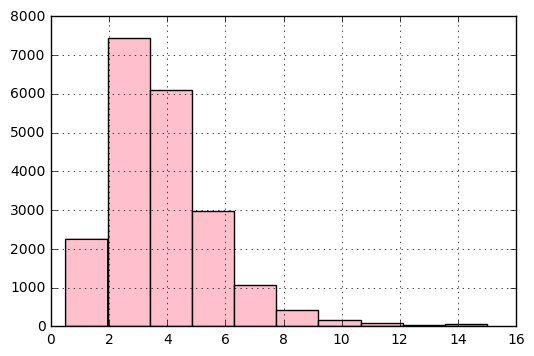

In [21]:
housing['median_income'].hist(color = 'pink')

<b> Dividing the median_income by 1.5 to reduce the 

In [22]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)

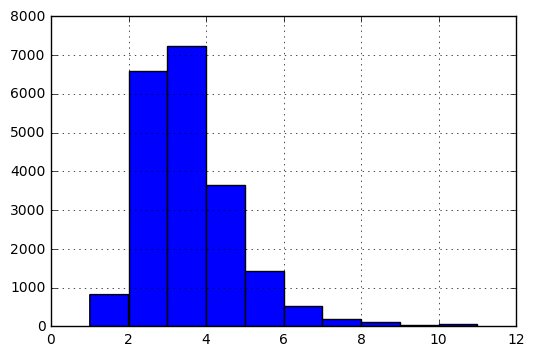

In [23]:
housing['income_cat'].hist()

Mergin all the categories greater than 5 into 5.

In [24]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

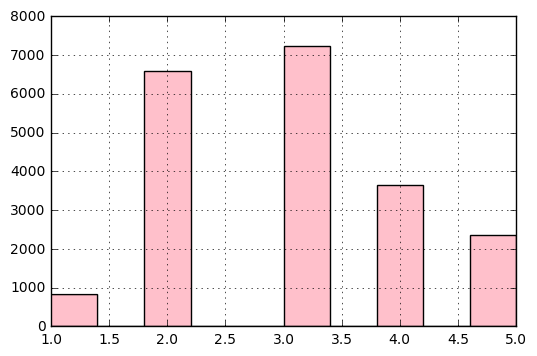

In [25]:
housing['income_cat'].hist(color = 'pink')

Stratified sampling

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [27]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [28]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [29]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

Remove the income_cat field

In [30]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [31]:
housing = strat_train_set.copy()

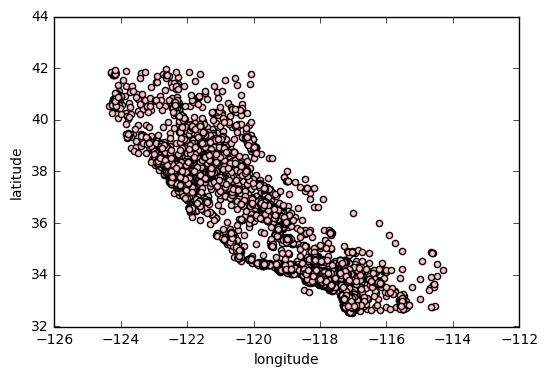

In [32]:
# Since we have geographical information(latitude and longitude), it is great idea to visualize
housing.plot(kind="scatter", x="longitude", y="latitude", color = 'pink')

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points

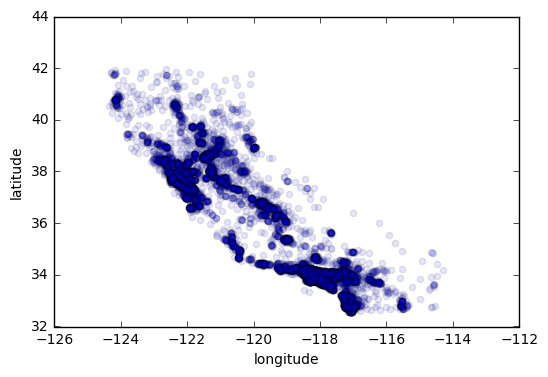

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

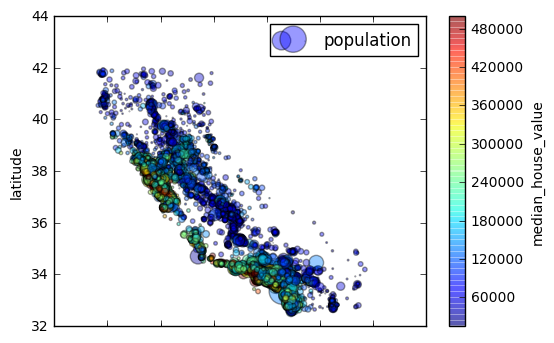

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [35]:
# Standard Correlation Coefficients
corr_matrix = housing.corr()

In [36]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [37]:
#Look how each attribute correlates with the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<b>Another way to check correlation between attributes is to use Pandas' scatter_matrix function. </b>

In [38]:
from pandas.tools.plotting import scatter_matrix

In [39]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111b2d080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11176a7f0>]], dtype=object)

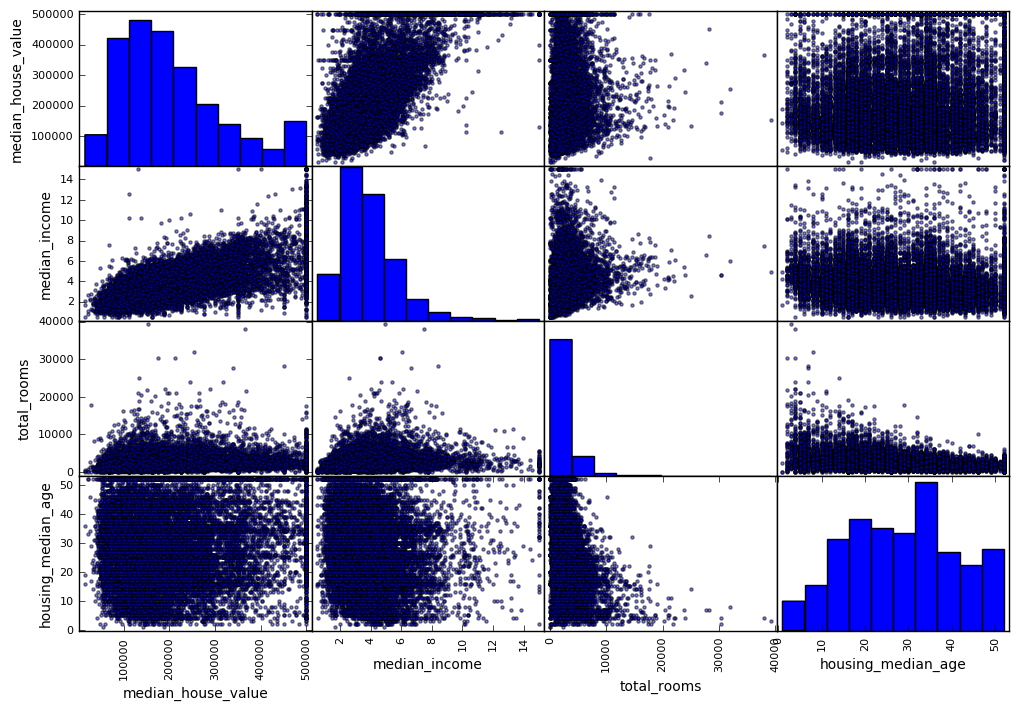

In [40]:
scatter_matrix(housing[attributes], figsize = (12,8))

Let's focus on median income

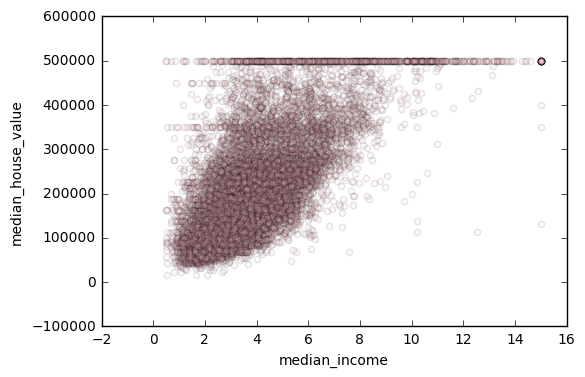

In [41]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1, color = 'pink' )

In [42]:
#Creating another varibales for correlations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [43]:
corr_matrix = housing.corr()

In [44]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

<b>Prepare the Data for Machine Learning Algorithms</b><p>
Lets start once again

In [45]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

<b>Cleaning</b>

<ol>
<li>housing.dropna(subset=["total_bedrooms"])    <b># option 1 - Get rid of corresponding districts</b></li>
<li>housing.drop("total_bedrooms", axis=1)       <b># option 2 - Get rid of whole attributes</b></li>
<li>median = housing["total_bedrooms"].median()<p>
housing["total_bedrooms"].fillna(median)     <b># option 3 - set the value to sum value.</b></li>
</ol>

In [46]:
# Implement option-3 using sklearn
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")

In [47]:
#Since the median can only be computed on numerical attributes, 
#we need to create a copy of the data without the text attribute ocean_proximity:
housing_num = housing.drop("ocean_proximity", axis=1)

In [48]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

<b><p>The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable. Only the total_bedrooms attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes:</b>

In [49]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [50]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

<b>Now you can use this “trained” imputer to transform the training set by replacing missing values by the learned medians:

In [51]:
X = imputer.transform(housing_num)

<b>The result is a plain Numpy array containing the transformed features. If you want to put it back into a Pandas DataFrame, it’s simple:

In [52]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [53]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


<b>Consistency. </b>All objects share a  consistent and simple interface:


We had removed the ocean_proximity fields from the df from the imputer because of text attribute. 
<p><b> Handing Text and Categorical Attributes</b>

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
encoder = LabelEncoder()

In [56]:
housing_cat = housing['ocean_proximity']

In [57]:
housing_cat_encoder = encoder.fit_transform(housing_cat)
housing_cat_encoder

array([0, 0, 4, ..., 1, 0, 3])

In [58]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


Fix the issue with the categorical variable - One Hot Encoder

In [59]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoder.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [60]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

We can apply both label and one hot encoder in single shot using LabelBinarizer

In [61]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [63]:
## Transformation Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy = 'median')),
        ('attrib_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [64]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [65]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [66]:
## Merging of two pipelines

from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy = 'median')),
        ('attrib_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])
full_pipeline = FeatureUnion(transformer_list = [
        ('num_pipeline', num_pipeline),
        ('cat_pipeline', cat_pipeline)
    ])

In [67]:
housing_prepared = full_pipeline.fit_transform(housing)

In [68]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [69]:
housing_prepared.shape

(16512, 16)

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attributes_names].values

In [71]:
### Linear Regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(housing_prepared, housing_labels)

In [72]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [73]:
some_data_prepared = full_pipeline.transform(some_data)

In [74]:
print("Prediction: \t", lin_reg.predict(some_data_prepared))

Prediction: 	 [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]


In [75]:
print("Labels: \t", list(some_labels))

Labels: 	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [76]:
## Evaluate RMSE
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489219

In [77]:
## It is huge error, so, trying DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor().fit(housing_prepared, housing_labels)

In [78]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [79]:
housing_labels[:2]

17606    286600.0
18632    340600.0
Name: median_house_value, dtype: float64

In [80]:
housing_predictions[:2]

array([ 286600.,  340600.])

In [81]:
## Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring = "neg_mean_squared_error", cv = 10)

In [82]:
rmse_scores = np.sqrt(-scores)

In [83]:
rmse_scores

array([ 69316.02634772,  65498.84994772,  71404.25935862,  69098.46240168,
        70580.30735263,  75540.88413124,  69717.93143674,  70428.42648461,
        75888.17618283,  68976.12268448])

In [84]:
rmse_scores.mean()

70644.944632828468

In [85]:
rmse_scores.std()

2938.9378926251234

In [86]:

def evaluate_cv(model, X = housing_prepared, y = housing_labels):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, 
                        scoring = "neg_mean_squared_error", cv = 10)
    return np.sqrt(-scores)
    

In [87]:
## Perform the cross validation on linear regression
lin_rmse_scores = evaluate_cv(lin_reg)

In [88]:
lin_rmse_scores

array([ 66782.73843989,  66960.118071  ,  70347.95244419,  74739.57052552,
        68031.13388938,  71193.84183426,  64969.63056405,  68281.61137997,
        71552.91566558,  67665.10082067])

In [89]:
lin_rmse_scores.mean()

69052.461363450828

In [90]:
lin_rmse_scores.std()

2731.6740017983411

In [91]:
## Try random forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor().fit(housing_prepared, housing_labels)


In [92]:
forest_rmse = evaluate_cv(forest_reg)

In [93]:
forest_rmse

array([ 52869.23106834,  49189.93801195,  51726.73647871,  54995.98190463,
        50979.93079904,  55978.43765914,  52283.7609046 ,  51001.92227546,
        54447.35786983,  53389.94422283])

In [94]:
forest_rmse.mean()

52686.324119452082

In [95]:
forest_rmse.std()

1971.2654779498739

In [96]:
## Trying SVR
from sklearn.svm import SVR
clf = SVR(C = 1.0, epsilon = 0.2).fit(housing_prepared, housing_labels)

In [97]:
svr_rmse = evaluate_cv(clf)

In [98]:
svr_rmse

array([ 111393.33263237,  119546.71049753,  116961.00489445,
        120449.0155974 ,  117622.20149717,  122303.76986818,
        117640.09907103,  121459.63518806,  120348.51364519,
        118025.61954959])

In [99]:
print(svr_rmse.mean())
print(svr_rmse.std())


118574.990244
2934.13294331


In [100]:
# Trying Gaussian NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(housing_prepared, housing_labels)

In [101]:
gnb_rmse = evaluate_cv(gnb)

/Users/amit/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [102]:
gnb_rmse.mean()

105484.39749296309

In [103]:
gnb_rmse

array([  95101.38645268,   90410.27859305,   97611.34935192,
        101022.7286895 ,  106201.51444176,  105968.0431303 ,
        109917.0971131 ,  111630.27686972,  119760.76895399,
        117220.5313336 ])

In [104]:
gnb_rmse.std()

9036.8567715188583

In [118]:
#Checking for best parameter
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [119]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, 
                           scoring= 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'bootstrap': [False], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [120]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [121]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [123]:
#Also evaluation scores are also available
cvres = grid_search.cv_results_


In [126]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64287.9678381 {'n_estimators': 3, 'max_features': 2}
55583.4105922 {'n_estimators': 10, 'max_features': 2}
52779.5424152 {'n_estimators': 30, 'max_features': 2}
60371.1831455 {'n_estimators': 3, 'max_features': 4}
53155.1191328 {'n_estimators': 10, 'max_features': 4}
50425.9153891 {'n_estimators': 30, 'max_features': 4}
59014.5449733 {'n_estimators': 3, 'max_features': 6}
52469.0446858 {'n_estimators': 10, 'max_features': 6}
49596.2307748 {'n_estimators': 30, 'max_features': 6}
58324.2871767 {'n_estimators': 3, 'max_features': 8}
52159.3116093 {'n_estimators': 10, 'max_features': 8}
50058.369279 {'n_estimators': 30, 'max_features': 8}
62618.8187516 {'n_estimators': 3, 'bootstrap': False, 'max_features': 2}
54111.0757785 {'n_estimators': 10, 'bootstrap': False, 'max_features': 2}
60273.0325435 {'n_estimators': 3, 'bootstrap': False, 'max_features': 3}
52613.6702236 {'n_estimators': 10, 'bootstrap': False, 'max_features': 3}
57697.2413333 {'n_estimators': 3, 'bootstrap': False, 'max_feat